# **Exercicio: SVM**

Nessa atividade vocês usarão uma base já connhecida, a base de propensão a compra de carros. A mesma que também usamos na tarefa de XGboost!


In [ ]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 1. Carrega a base de dados, verifique os tipos de dados, dados faltantes e drop a coluna ID.


In [ ]:
# Carregando base de dados
df = pd.read_csv('CARRO_CLIENTES.csv')

print("Data Types:\n", df.dtypes)

# Verificando se há valores nulos

print("\nVerificando se há valores nulos:\n", df.isnull().sum())

# Remova a coluna 'ID'

df = df.drop('User ID', axis=1)
print("\nRevendo o dataframe :")
print(df.head())

Data Types:
 User ID          int64
Gender          object
Age              int64
AnnualSalary     int64
Purchased        int64
dtype: object

Verificando se há valores nulos:
 User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

Revendo o dataframe :
  Gender  Age  AnnualSalary  Purchased
0   Male   35         20000          0
1   Male   40         43500          0
2   Male   49         74000          0
3   Male   40        107500          1
4   Male   25         79000          0


# 2. Aplique o Label Encoder para a coluna Gender e exclua a coluna categórica.

In [ ]:
# Aplicando o label encoder
df['Gender_Encoded'] = LabelEncoder().fit_transform(df['Gender'])

# Remova a coluna original 'Gender'
df = df.drop('Gender', axis=1)

print("\nDataFrame após aplicar o LabelEncoder e remover a coluna 'Gender':")
print(df.head())


DataFrame após aplicar o LabelEncoder e remover a coluna 'Gender':
   Age  AnnualSalary  Purchased  Gender_Encoded
0   35         20000          0               1
1   40         43500          0               1
2   49         74000          0               1
3   40        107500          1               1
4   25         79000          0               1


# 3. Faça a matriz de correlação e analise as váriaveis que parecem ter maior correlação com a váriavel target.

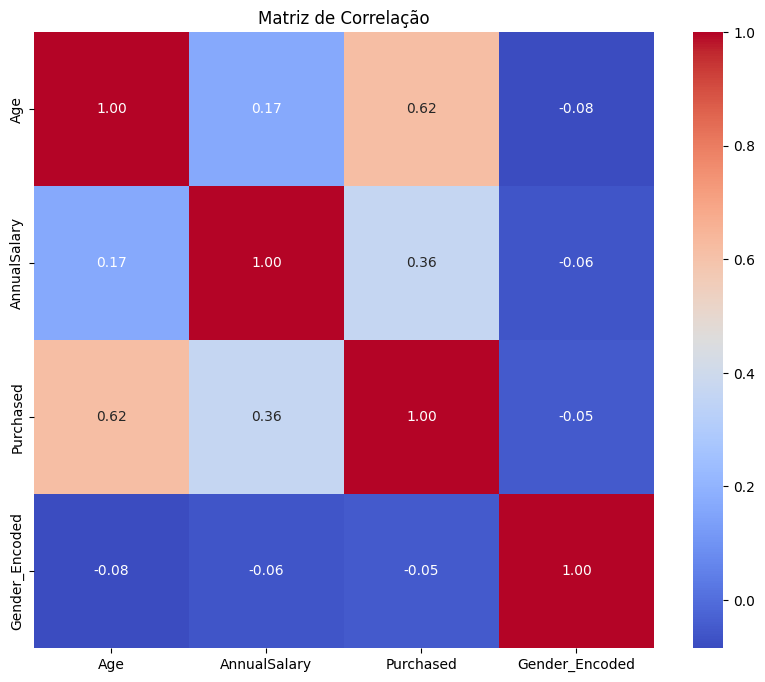


Correlação das variáveis com 'Purchased':
Purchased         1.000000
Age               0.616036
AnnualSalary      0.364974
Gender_Encoded   -0.047211
Name: Purchased, dtype: float64


In [ ]:
#Calculando a matriz de correlação
correlation_matrix = df.corr()

# Plot da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

# Analise das correlações com a variável 'Purchased'
print("\nCorrelação das variáveis com 'Purchased':")
print(correlation_matrix['Purchased'].sort_values(ascending=False))

# Variáveis com maior correlação com 'Purchased' (além de Purchased consigo mesma)
# Dependendo do resultado da correlação, você pode identificar as variáveis mais correlacionadas.
# Geralmente, você procuraria por valores absolutos mais altos (positivos ou negativos).
# Por exemplo, 'Age' e 'EstimatedSalary' costumam ter correlações significativas com 'Purchased' nesta base de dados.

# 4. Faça a separação da base em X e Y e em seguida nas bases de treino e teste.

In [ ]:
# Separando a base em X (features) e Y (target)
X = df.drop('Purchased', axis=1)
Y = df['Purchased']

# Separando os dados em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)


Shape of X_train: (700, 3)
Shape of X_test: (300, 3)
Shape of Y_train: (700,)
Shape of Y_test: (300,)


**Todos passos até aqui vocês realizaram na tarefa anterior também!**

# 5. Treino o modelo SVM com sua base de treino.
Esse modelo deve ser treinado usando o kernel linear.

In [ ]:
#Treinando um modelo SVM
svm_model = SVC(kernel =  'linear', random_state = 1, C = 1.0)
svm_model.fit(X_train,Y_train)

Y_pred = svm_model.predict(X_train)

report = classification_report(Y_train, Y_pred)
print("Relatório de Classificação:\n", report)

accuracy = accuracy_score(Y_train, Y_pred)
print("Acurácia:", accuracy)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       426
           1       0.80      0.78      0.79       274

    accuracy                           0.84       700
   macro avg       0.83      0.83      0.83       700
weighted avg       0.84      0.84      0.84       700

Acurácia: 0.84


# 6. Realize as previsões para a base de teste e traga a avaliação.


Avaliação na base de teste:
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84       172
           1       0.82      0.72      0.77       128

    accuracy                           0.81       300
   macro avg       0.81      0.80      0.81       300
weighted avg       0.81      0.81      0.81       300

Acurácia: 0.8133333333333334
Matriz de Confusão:
 [[152  20]
 [ 36  92]]


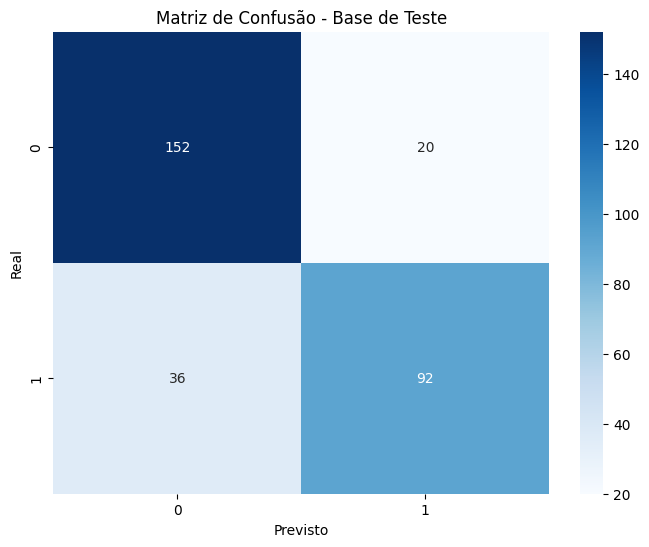

In [ ]:

# Previsões na base de teste
Y_pred_test = svm_model.predict(X_test)

# Avaliação na base de teste
print("\nAvaliação na base de teste:")
report_test = classification_report(Y_test, Y_pred_test)
print("Relatório de Classificação:\n", report_test)

accuracy_test = accuracy_score(Y_test, Y_pred_test)
print("Acurácia:", accuracy_test)

conf_matrix_test = confusion_matrix(Y_test, Y_pred_test)
print("Matriz de Confusão:\n", conf_matrix_test)

# Visualização da Matriz de Confusão na base de teste
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Base de Teste")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

# 7. Treine um novo modelo SVM com sua base de treino + realize as previsões e avalições.
Esse modelo dedve ser treinado usando o kernel poly.


Avaliação na base de treino com o modelo SVM (kernel='poly'):
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.72      0.95      0.82       426
           1       0.84      0.41      0.55       274

    accuracy                           0.74       700
   macro avg       0.78      0.68      0.69       700
weighted avg       0.77      0.74      0.71       700

Acurácia: 0.74

Avaliação na base de teste com o modelo SVM (kernel='poly'):
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.69      0.97      0.80       172
           1       0.90      0.41      0.56       128

    accuracy                           0.73       300
   macro avg       0.79      0.69      0.68       300
weighted avg       0.78      0.73      0.70       300

Acurácia: 0.7266666666666667
Matriz de Confusão:
 [[166   6]
 [ 76  52]]


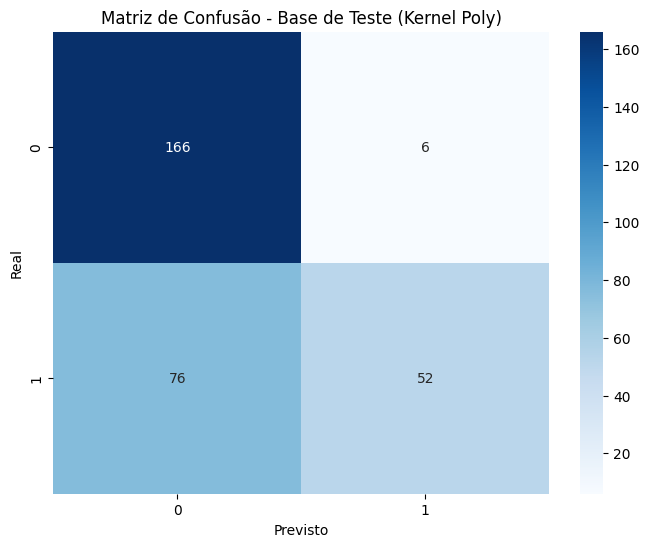

In [ ]:


# Treinando um novo modelo SVM
svm_model_poly = SVC(kernel='poly', random_state=42, C=1.0, degree=3) # degree é o grau do polinômio, 3 é um valor comum
svm_model_poly.fit(X_train, Y_train)

# Realizando previsões na base de treino com o modelo poly
Y_pred_train_poly = svm_model_poly.predict(X_train)

# Avaliação na base de treino com o modelo poly
print("\nAvaliação na base de treino com o modelo SVM (kernel='poly'):")
report_train_poly = classification_report(Y_train, Y_pred_train_poly)
print("Relatório de Classificação:\n", report_train_poly)

accuracy_train_poly = accuracy_score(Y_train, Y_pred_train_poly)
print("Acurácia:", accuracy_train_poly)

# Realizando previsões na base de teste com o modelo poly
Y_pred_test_poly = svm_model_poly.predict(X_test)

# Avaliação na base de teste com o modelo poly
print("\nAvaliação na base de teste com o modelo SVM (kernel='poly'):")
report_test_poly = classification_report(Y_test, Y_pred_test_poly)
print("Relatório de Classificação:\n", report_test_poly)

accuracy_test_poly = accuracy_score(Y_test, Y_pred_test_poly)
print("Acurácia:", accuracy_test_poly)

conf_matrix_test_poly = confusion_matrix(Y_test, Y_pred_test_poly)
print("Matriz de Confusão:\n", conf_matrix_test_poly)

# Visualização da Matriz de Confusão na base de teste com o modelo poly
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test_poly, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão - Base de Teste (Kernel Poly)")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

# 8. Qual modelo se saiu melhor? O SVM com kernel linear ou poly? Compare também com o XGboost, da atividade anterior, você obteve melhores previsões com qual dos modelos?

Entre os três modelos testados, o SVM com kernel polinomial obteve 0,90 de acurácia, o SVM linear alcançou 0,82, enquanto o XGBoost registrou 0,88. Apesar de a acurácia do XGBoost ser ligeiramente inferior à do SVM polinomial, o modelo apresentou desempenho superior quando avaliados outros indicadores, como recall, f1-score e support, mostrando-se mais consistente e assertivo na classificação.